In [11]:
import pandas as pd
import numpy as np

import platform
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry')    

plt.rcParams['axes.unicode_minus'] = False

In [12]:
data_draw_korea = pd.read_csv('data/data_draw_korea.csv', index_col=0, encoding='UTF-8')
data_draw_korea.head()

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시


In [3]:
#캠프 csv파일 불러오기 

camp_data = pd.read_csv('./data/camp_20211104.csv', encoding='cp949')
camp = pd.DataFrame(camp_data)
camp.head()


,야영(캠핑)장명,야영(캠핑)장구분,위도,경도,소재지도로명주소,소재지지번주소,야영장전화번호,야영사이트수,부지면적,건축연면적,...,편의시설,안전시설,기타부대시설,이용시간,이용요금,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명
0,오션파크,야영장,36.674492,126.280866,충청남도 태안군 남면 몽산포길 161,충청남도 태안군 남면 몽산리 782-13,041-672-3043,2,4899.0,NaN,...,전기시설+하수도시설,소화기+대피공간,NaN,NaN,NaN,041-670-2766,태안군청,2020-01-28,6440000,충청남도
1,돌고래오토캠핑장,야영장,36.674213,126.269347,충청남도 태안군 남면 몽대로 512-21,충청남도 태안군 남면 몽산리 661-4,041-000-0000,1,1587.0,NaN,...,전기시설+하수도시설,소화기+대피공간,NaN,NaN,NaN,041-670-2766,태안군청,2020-01-28,6440000,충청남도
2,한마음오토캠핑장,야영장,36.423465,126.361229,충청남도 태안군 고남면 큰장돌길 283-22,충청남도 태안군 고남면 장곡리 617-1,041-000-0000,8,1030.0,NaN,...,전기시설+하수도시설,소화기+대피공간,NaN,NaN,NaN,041-670-2766,태안군청,2020-01-28,6440000,충청남도
3,만리포미소카라반,야영장,36.783852,126.140370,충청남도 태안군 소원면 만리포2길 112-1,충청남도 태안군 소원면 모항리 1325-120,041-000-0000,3,1421.0,62.8,...,전기시설+하수도시설,소화기+대피공간,NaN,NaN,NaN,041-670-2766,태안군청,2020-01-28,6440000,충청남도
4,곰섬야영장,야영장,36.588530,126.291194,충청남도 태안군 남면 곰섬로 500-17,충청남도 태안군 남면 신온리 903-34,041-000-0000,52,8781.0,75,...,전기시설+하수도시설,소화기+대피공간,NaN,NaN,NaN,041-670-2766,태안군청,2020-01-28,6440000,충청남도


In [4]:
### 잘라내기 연습    -> 삭제 
addr = camp[['소재지도로명주소']]
addr.head()


,소재지도로명주소
0,충청남도 태안군 남면 몽산포길 161
1,충청남도 태안군 남면 몽대로 512-21
2,충청남도 태안군 고남면 큰장돌길 283-22
3,충청남도 태안군 소원면 만리포2길 112-1
4,충청남도 태안군 남면 곰섬로 500-17


In [5]:
camp['광역시도'] = camp['소재지도로명주소'].str.split().str[0]
camp['행정구역'] = camp['소재지도로명주소'].str.split().str[1]
camp


# df['grp'] = df.id.str.split('_').str[0] print(df) 

,야영(캠핑)장명,야영(캠핑)장구분,위도,경도,소재지도로명주소,소재지지번주소,야영장전화번호,야영사이트수,부지면적,건축연면적,...,기타부대시설,이용시간,이용요금,관리기관전화번호,관리기관명,데이터기준일자,제공기관코드,제공기관명,광역시도,행정구역
0,오션파크,야영장,36.674492,126.280866,충청남도 태안군 남면 몽산포길 161,충청남도 태안군 남면 몽산리 782-13,041-672-3043,2,4899.0,NaN,...,NaN,NaN,NaN,041-670-2766,태안군청,2020-01-28,6440000,충청남도,충청남도,태안군
1,돌고래오토캠핑장,야영장,36.674213,126.269347,충청남도 태안군 남면 몽대로 512-21,충청남도 태안군 남면 몽산리 661-4,041-000-0000,1,1587.0,NaN,...,NaN,NaN,NaN,041-670-2766,태안군청,2020-01-28,6440000,충청남도,충청남도,태안군
2,한마음오토캠핑장,야영장,36.423465,126.361229,충청남도 태안군 고남면 큰장돌길 283-22,충청남도 태안군 고남면 장곡리 617-1,041-000-0000,8,1030.0,NaN,...,NaN,NaN,NaN,041-670-2766,태안군청,2020-01-28,6440000,충청남도,충청남도,태안군
3,만리포미소카라반,야영장,36.783852,126.140370,충청남도 태안군 소원면 만리포2길 112-1,충청남도 태안군 소원면 모항리 1325-120,041-000-0000,3,1421.0,62.8,...,NaN,NaN,NaN,041-670-2766,태안군청,2020-01-28,6440000,충청남도,충청남도,태안군
4,곰섬야영장,야영장,36.588530,126.291194,충청남도 태안군 남면 곰섬로 500-17,충청남도 태안군 남면 신온리 903-34,041-000-0000,52,8781.0,75,...,NaN,NaN,NaN,041-670-2766,태안군청,2020-01-28,6440000,충청남도,충청남도,태안군
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,패미리오토캠핑장,자동차야영장,35.546513,128.858902,경상남도 밀양시 산외면 밀양대로 3516,경상남도 밀양시 산외면 희곡리7,NaN,40,5836.0,186,...,소매점,당일 14:00~익일 12:00기준,"1일 40,000원",055-359-5644,밀양시청,2017-11-01,5360000,경상남도 밀양시,경상남도,밀양시
2223,재약산 숲 야영장,일반야영장,35.524950,128.909966,경상남도 밀양시 단장면 표충로 865,경상남도 밀양시 단장면 범도리774-1,NaN,5,1406.0,120,...,NaN,당일 14:00~익일 12:00기준,"1일 40,000원",055-359-5644,밀양시청,2017-11-01,5360000,경상남도 밀양시,경상남도,밀양시
2224,구만산장 캠핑장,일반야영장,35.600971,128.871048,경상남도 밀양시 산내면 봉의로 223-6,경상남도 밀양시 산내면 봉의리939,NaN,48,3053.0,456,...,NaN,당일 14:00~익일 12:00기준,"1일 40,000원",055-359-5644,밀양시청,2017-11-01,5360000,경상남도 밀양시,경상남도,밀양시
2225,향림오토캠핑장,자동차야영장,35.579935,128.980200,경상남도 밀양시 산내면 얼음골로134-25,NaN,NaN,16,4015.0,191,...,소매점,당일 14:00~익일 12:00기준,"1일 40,000원",055-359-5644,밀양시청,2017-11-01,5360000,경상남도 밀양시,경상남도,밀양시


In [6]:
camp_count = pd.array(camp['행정구역'].value_counts())
camp_count

<PandasArray>
[145,  99,  95,  93,  65,  54,  53,  42,  41,  38,
 ...
   1,   1,   1,   1,   1,   1,   1,   1,   1,   1]
Length: 137, dtype: int64

In [39]:
camp_count = pd.DataFrame(camp['행정구역'].value_counts())
camp_count

,행정구역
가평군,145
태안군,99
포천시,95
영월군,93
홍천군,65
...,...
달서구,1
예천군,1
성남시,1
태백시,1


In [40]:
camp_count_r = camp_count.reset_index()
camp_count_r.columns = ['행정구역', '개수']
camp_count_r

,행정구역,개수
0,가평군,145
1,태안군,99
2,포천시,95
3,영월군,93
4,홍천군,65
...,...,...
132,달서구,1
133,예천군,1
134,성남시,1
135,태백시,1


In [41]:
camp_k   = camp_count_r.join(data_draw_korea.set_index('행정구역')['광역시도'], on='행정구역')
camp_x   = camp_k.join(data_draw_korea.set_index('행정구역')['x'], on='행정구역')
camp_x_y = camp_x.join(data_draw_korea.set_index('행정구역')['y'], on='행정구역')

camp_x_y 

,행정구역,개수,광역시도,x,y
0,가평군,145,경기도,9,3
1,태안군,99,충청남도,1,9
2,포천시,95,경기도,8,1
3,영월군,93,강원도,10,8
4,홍천군,65,강원도,10,4
...,...,...,...,...,...
132,달서구,1,대구광역시,8,15
133,예천군,1,경상북도,9,9
134,성남시,1,경기도,7,8
135,태백시,1,강원도,11,7


In [42]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

gamma = 0.75

blockedMap = camp_x_y
targetData = '개수'

whitelabelmin = (max(blockedMap[targetData]) - min(blockedMap[targetData])) * 0.25 + min(blockedMap[targetData])

datalabel = targetData

vmin = min(blockedMap[targetData])
vmax = max(blockedMap[targetData])

#mapdata = blockedMap.pivot(index='y', columns='x', values=targetData)
mapdata = pd.pivot_table(blockedMap, index='y', columns='x', values= targetData, aggfunc=np.sum)
masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

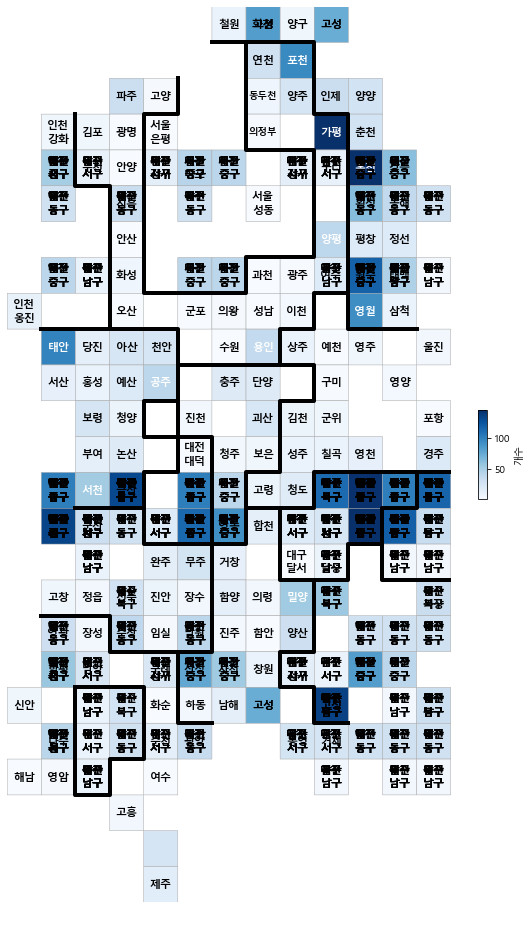

In [45]:
cmapname = 'Blues' #'Reds'

plt.figure(figsize=(8, 13))
plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)


# 지역 이름 표시
for idx, row in blockedMap.iterrows():
    #annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
    annocolor = 'white' if row[targetData] > whitelabelmin else 'black'
 

    # 광역시는 구 이름이 겹치는 경우가 많아서 시단위 이름도 같이 표시한다. (중구, 서구)
    if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'):
        dispname = '{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1])
        if len(row['행정구역']) <= 2:
            dispname += row['행정구역'][-1]
    else:
        dispname = row['행정구역'][:-1]


    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시한다.
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', color=annocolor,
                 linespacing=linespacing)


'''
plt.annotate(row['행정구역'], (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize= 11 , ha='center', va='center', color=annocolor,
                 linespacing= 1.2)
'''

# 시도 경계 그린다.
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=4)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')
    
cb = plt.colorbar(shrink=.1, aspect=10)
cb.set_label(datalabel)

plt.tight_layout()
plt.show()